In [1]:
import cv2
import numpy as np
import pandas as pd
from ultralytics import YOLO
from tracker import Tracker
from detector import Detector
from teams import TeamAffiliation
from keypoint_detector import KeypointDetector
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import utils
from player_position import PlayerPosition

In [2]:
model = YOLO("runs/detect/train38/weights/best.pt")
model_keypoints = YOLO("runs/pose/train9/weights/best.pt")
detector = Detector(model, 0.5)
keypoint_detector = KeypointDetector(model_keypoints)
tracker = Tracker(detector)
positions = PlayerPosition()

In [3]:
video_path = r"C:\Users\Marcin\Videos\ganzgut.mp4"
frames = utils.load_frames(video_path)

In [4]:
tracks = tracker.track(frames)


0: 384x640 20 players, 54.0ms
Speed: 5.0ms preprocess, 54.0ms inference, 143.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 21 players, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 2.0ms postprocess per image at s

In [5]:
keypoints = keypoint_detector.get_keypoints(frames) 


0: 384x640 1 pitch, 25.0ms
Speed: 2.0ms preprocess, 25.0ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 pitch, 12.0ms
Speed: 1.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

In [6]:
player_positions = positions.get_players_position(keypoints, tracks)

In [7]:
teams = TeamAffiliation(tracks, frames)

In [8]:
player_teams = teams.get_teams()

In [9]:
# pitch = Pitch(pitch_type='custom', axis=True, label=True, pitch_length=105, pitch_width=68)
# fig, ax = pitch.draw()
# scatter = pitch.scatter(player_positions[1][:, 0], player_positions[1][:, 1], ax=ax, edgecolor="black", c = player_teams[1])
# plt.grid()

In [66]:
player_positions

[array([[     34.599,      47.237],
        [     65.345,      47.364],
        [     44.957,       58.33],
        [     56.908,      54.674],
        [     64.835,      54.625],
        [     52.755,      53.091],
        [     57.982,      46.245],
        [     63.854,      37.227],
        [     32.778,       29.05],
        [     63.761,      16.624],
        [     44.912,      39.059],
        [     36.851,      15.944],
        [     52.809,      19.839],
        [     48.022,      25.644],
        [     42.521,      39.977],
        [     52.822,      33.521],
        [     62.547,      7.1451],
        [     51.204,      46.477],
        [     31.295,       71.86],
        [     64.899,      28.458]]),
 array([[     34.596,      47.164],
        [     65.339,      47.321],
        [     56.907,      54.598],
        [     44.957,      58.281],
        [     64.825,      54.592],
        [     52.733,      53.147],
        [     57.977,      46.207],
        [     63.851,     

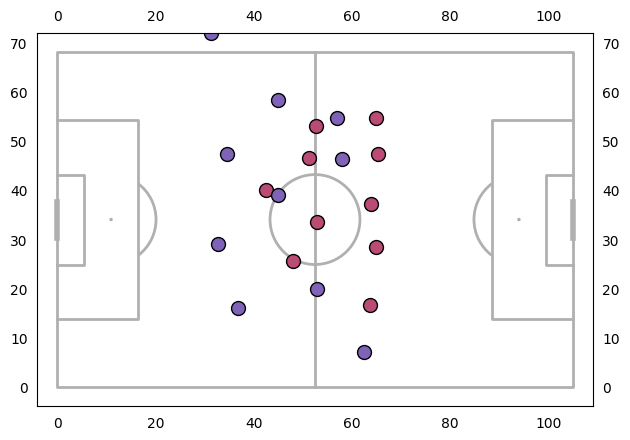

In [10]:
from matplotlib import animation
pitch = Pitch(pitch_type='custom', axis=True, label=True, pitch_length=105, pitch_width=68)
fig, ax = pitch.draw()
marker_kwargs = {'marker': 'o', 'markeredgecolor': 'black', 'linestyle': 'None'}
away, = ax.plot([], [], ms=10, markerfacecolor='#b94b75', **marker_kwargs)
home, = ax.plot([], [], ms=10, markerfacecolor='#7f63b8', **marker_kwargs)

def animate(i):
    frame_postions = player_positions[i]
    fame_teams = player_teams[i]
    home_positions = frame_postions[fame_teams == np.int32(0)]
    away_positions = frame_postions[fame_teams == np.int32(1)]
    home.set_data(home_positions[:, 0], home_positions[:, 1])
    away.set_data(away_positions[:, 0], away_positions[:, 1])
    return home, away
    
ani = animation.FuncAnimation(fig, animate, frames=len(player_positions), interval=100, blit=True)
plt.show()

In [25]:
player_positions[0]

array([[     34.599,      47.237],
       [     65.345,      47.364],
       [     44.957,       58.33],
       [     56.908,      54.674],
       [     64.835,      54.625],
       [     52.755,      53.091],
       [     57.982,      46.245],
       [     63.854,      37.227],
       [     32.778,       29.05],
       [     63.761,      16.624],
       [     44.912,      39.059],
       [     36.851,      15.944],
       [     52.809,      19.839],
       [     48.022,      25.644],
       [     42.521,      39.977],
       [     52.822,      33.521],
       [     62.547,      7.1451],
       [     51.204,      46.477],
       [     31.295,       71.86],
       [     64.899,      28.458]])

In [11]:
# plt.rcParams['animation.ffmpeg_path'] = ''

In [12]:
# ani.save('animation.mp4', fps=30)

In [31]:
dict_to_save = {'frame': [], 'track_id': [], 'x': [], 'y': [], 'team': []}
frame_id = 1
for frame_positions, frame_tracks, frame_teams in zip(player_positions, tracks, player_teams):
    dict_to_save['frame'] += [frame_id for _ in frame_positions]
    dict_to_save['track_id'] += frame_tracks.tracker_id.tolist()
    dict_to_save['x'] += frame_positions[:,0].tolist()
    dict_to_save['y'] += frame_positions[:,1].tolist()
    dict_to_save['team'] += frame_teams
    frame_id += 1
    

In [32]:
dict_to_save

{'frame': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  11

In [65]:
pd.DataFrame(dict_to_save).to_csv('points.csv', index=False)